In [0]:
# example of loading the generator model and generating images
import numpy
from numpy import asarray
from numpy.random import randn
from numpy.random import randint
from tensorflow.keras.models import load_model
from matplotlib import pyplot
from numpy import load
from numpy import mean
from numpy import vstack
from numpy import expand_dims
from numpy import savez_compressed
from numpy import array
import os


In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
os.chdir("/content/drive/My Drive/deeplearning/")
!ls

cgan				      img_align_celeba_attractive_face.npz
gan_model.png			      img_align_celeba_attractive_full.npz
generated_faces_200.png		      latent_points_200.npz
ids_align_celeba_attractive_face.npz  list_attr_celeba.csv
ids_align_celeba_attractive_full.npz  results


In [0]:
qSaveModel = True
strImageNumber = "200"
dirImage = "generated_faces_"+strImageNumber+".png"
dirModel = "results/generator_model_"+strImageNumber+".h5"
dirLatentPoints = "latent_points_"+strImageNumber+".npz"
toothysmile_woman_ix = [10,12,13,15]
toothysmile_man_ix = [2,82,35,41]
neutral_man_ix = [42,43,94,98]

In [0]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=10):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	z_input = x_input.reshape(n_samples, latent_dim)
	return z_input

In [0]:
# create a plot of generated images
def plot_generated(examples, n):
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i, :, :])
	pyplot.savefig(dirImage)
	pyplot.close()

In [0]:
if qSaveModel:
	# load model
	model = load_model(dirModel)
	# generate points in latent space
	latent_points = generate_latent_points(100, 100)
	# save points
	savez_compressed("latent_points_100.npz", latent_points)
	# generate images
	#labels = randint(1, 1, 100)
	labels = numpy.zeros(100)
	X = model.predict([latent_points, labels])
	# scale from [-1,1] to [0,1]
	X = (X + 1) / 2.0
	# save plot
	plot_generated(X, 10)

In [0]:
# average list of latent space vectors
def average_points(points, ix):
	# convert to zero offset points
	zero_ix = [i-1 for i in ix]
	# retrieve required points
	vectors = points[zero_ix]
	# average the vectors
	avg_vector = mean(vectors, axis=0)
	# combine original and avg vectors
	all_vectors = vstack((vectors, avg_vector))
	return all_vectors

In [0]:
# create a plot of generated images
def plot_generated(examples, rows, cols):
	# plot images
	for i in range(rows * cols):
		# define subplot
		pyplot.subplot(rows, cols, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i, :, :])
	pyplot.show()

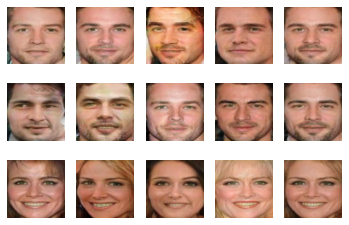

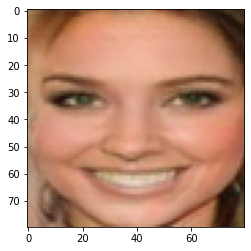

In [38]:
# load model
model = load_model(dirModel)
# load the saved latent points
data = load(dirLatentPoints)
points = data['arr_0']
# average vectors
toothysmile_woman = average_points(points, toothysmile_woman_ix)
toothysmile_man = average_points(points, toothysmile_man_ix)
neutral_man = average_points(points, neutral_man_ix)
# combine all vectors
all_vectors = vstack((neutral_man, toothysmile_man, toothysmile_woman))
#create labels for embedding
all_labels = array((1,1,1,1,1,  1,1,1,1,1, 2,2,2,2,2))
# generate images
images = model.predict([all_vectors, all_labels])
# scale pixel values
images = (images + 1) / 2.0
plot_generated(images,3,5)

# neutral man - toothysmile man + toothysmile woman = neutral woman
result_vector = neutral_man[-1] - toothysmile_man[-1] - toothysmile_woman[-1]
# generate image
result_vector = expand_dims(result_vector, 0)
labels = array([2])
result_image = model.predict([result_vector, labels])
# scale pixel values
result_image = (result_image + 1) / 2.0
pyplot.imshow(result_image[0])
pyplot.show()


(10000, 100)
(10000, 80, 80, 3)


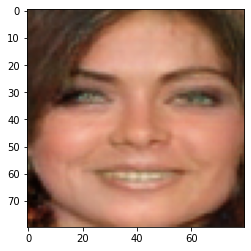

In [51]:
model = load_model("results/generator_model_200.h5")
CGAN_data_file = "latent_points_10000.npz"
latent_points = numpy.load(CGAN_data_file)["arr_0"]
print(latent_points.shape)
# generate images
labels = randint(1, 3, 10000)
images2 = model.predict([latent_points, labels])
# scale from [-1,1] to [0,1]
images2 = (images2 + 1) / 2.0
print(images2.shape)
pyplot.imshow(images2[0, :, :])